In [121]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [275]:
references_df = pd.read_csv('data/references.csv')

In [276]:
references_df.head()

,Unnamed: 0,ref,file,ref_parsed,year,identifier
0,0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni..."
1,1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (..."
2,2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish..."
3,3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act..."
4,4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip..."


In [62]:
rootdir = 'data/papers'

In [63]:
contents = []
source = []
errors = []
paths = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
        paths.append(path)
        with open(path) as file:
            try:
                text = file.read()
                contents.append(text)
                source.append(subdir[len(rootdir):])
            except:
                name, message, content = sys.exc_info()
                errors.append(message)

In [406]:
dict_matching = {}


In [407]:
for i,elem in enumerate(paths): 
    dict_matching[elem[elem.find('import'):elem.find('.txt')]] = contents[i][:contents[i].find('\n')]

In [408]:
dict_matching

{'import2015full_105': '“That’s What Everyone Else Is Saying…”:',
 'import2015full_122': 'The 3R Orchestration Cycle:',
 'import2015full_126': 'Principle-Based Guidance to Foster Adaptive Teaching Practice',
 'import2015full_136': 'Connected Biology: A Usability Study of Web 2.0 Tools',
 'import2015full_146': 'A Multivocality Approach to Epistemic Agency',
 'import2015full_150': '“This Is the Size of One Meter”: Children’s Bodily-Material',
 'import2015full_154': 'The Development of Situational-Misconceptions',
 'import2015full_158': 'Dialogism:',
 'import2015full_162': 'Boundary Interactions: Resolving Interdisciplinary Collaboration',
 'import2015full_165': 'Design Features for Computer-Supported Complex Systems',
 'import2015full_167': 'A Long-Term View on Learning to Argue in Facebook:',
 'import2015full_169': 'Beyond Pedagogical Challenges: Addressing the Social Aspects',
 'import2015full_171': 'Constructing Knowledge: A Community of Practice Framework',
 'import2015full_172': 'Co

In [411]:
pd.DataFrame.from_dict(dict_matching,orient = 'index').to_csv('dict_file_matching.csv')

In [79]:
list_ = []
for file in tqdm(references_df['file']):
    try : 
        list_.append(dict_matching[file])
    except KeyError: 
        print(file)

100%|██████████| 14686/14686 [00:00<00:00, 921553.37it/s]


In [78]:
references_df['titles'] = list_ 

In [80]:
references_df.head()

,Unnamed: 0,ref,file,ref_parsed,year,identifier,titles
0,0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni...",Learning Scientific Practices Through Particip...
1,1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",Learning Scientific Practices Through Particip...
2,2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",Learning Scientific Practices Through Particip...
3,3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act...",Learning Scientific Practices Through Particip...
4,4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",Learning Scientific Practices Through Particip...


In [84]:
groupped_by = references_df.groupby(by ='titles')

In [89]:
dict_of_references_by_title = {}

In [96]:
set(groupped_by.get_group('The Effect of Scaffolding on the Immediate Transfer of Students’')['identifier'])

{'Chinn, C., & Brewer, W. (1993). The role of anomalous data in knowledge acquisition: A theoretical framework and implications for science instruction',
 'Gobert, J. D., Sao Pedro, M., Raziuddin, J., & Baker, R. S. (2013b). From Log Files to Assessment Metrics for Science Inquiry Using Educational Data Mining',
 "Gotwals, A. W., & Songer, N. B. (2009). Reasoning up and down a food chain: Using an assessment framework to investigate students' middle knowledge",
 'Kang, H., Thompson, J., & Windschitl, M. (2014). Creating opportunities for students to show what they know: the role of scaffolding in assessment tasks',
 'Klayman, J. (1995). Varieties of confirmation bias',
 'Kuhn, D., Schauble, L., & Garcia-Mila, M. (1992). Cross-domain development of scientific reasoning',
 'McNeill, K. L., & Krajcik, J. S. (2011). Supporting Grade 5-8 Students in Constructing Explanations in Science: The Claim, Evidence, and Reasoning Framework for Talk and Writing',
 'Moussavi, R., Kennedy, M., Sao Pedr

In [93]:
references_df['titles'].unique()

array(['Learning Scientific Practices Through Participation as a Volunteer',
       'Visualizing Complex Classrooms Through Real Time Observations',
       'Opening the Door to Algebra: The Role of Fraction Knowledge in',
       'Measuring Maker Mindset: Establishing Content Validity With Card',
       'Fostering University Freshmen’s Mathematical Argumentation',
       'The Effect of Concrete Materials on Children’s Subsequent',
       '“My Favorite Part Is When We Tell the Truth”: Identity and Agency',
       'Expanding Outcomes: Exploring Varied Forms of Teacher',
       'scaling-up ......................................................................................................................................................... 1074',
       'Scaffolding Into Ambitious Teaching: Representations of',
       'Revising Biology Misconceptions Using an Online Activity With',
       'Evaluating Innovative Collaborative Learning Practice:',
       'Knowledge Construction in the Instr

In [97]:
for title in references_df['titles'].unique():
    dict_of_references_by_title[title] = set(groupped_by.get_group(title)['identifier'])

In [99]:
nodes = references_df['titles'].unique()

In [104]:
adjacency = np.zeros((len(nodes),len(nodes)))

In [106]:
for i,doc1 in enumerate(nodes):
    for j,doc2 in enumerate(nodes):
        if len(dict_of_references_by_title[doc1] & dict_of_references_by_title[doc2]) != 0 : 
            adjacency[i][j] = 1


In [107]:
adjacency

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [108]:
def matrix_to_list(matrix):
    graph = {}
    for i, node in enumerate(matrix):
        adj = []
        for j, connected in enumerate(node):
            if connected:
                adj.append(j)
        graph[i] = adj
    return graph

In [109]:
graph = matrix_to_list(adjacency)

In [171]:
G=nx.Graph(graph)

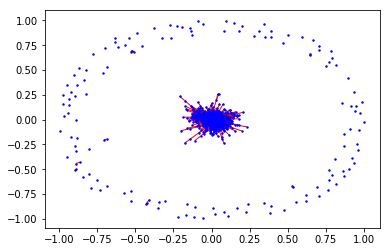

In [172]:
nx.draw_networkx(G,node_color='b',edge_color='r',node_size= 2, with_labels=False,pos= nx.spring_layout(G))
plt.show()


In [151]:
from networkx.algorithms.community import k_clique_communities

In [ ]:
k_clique = list(k_clique_communities(G, 7))

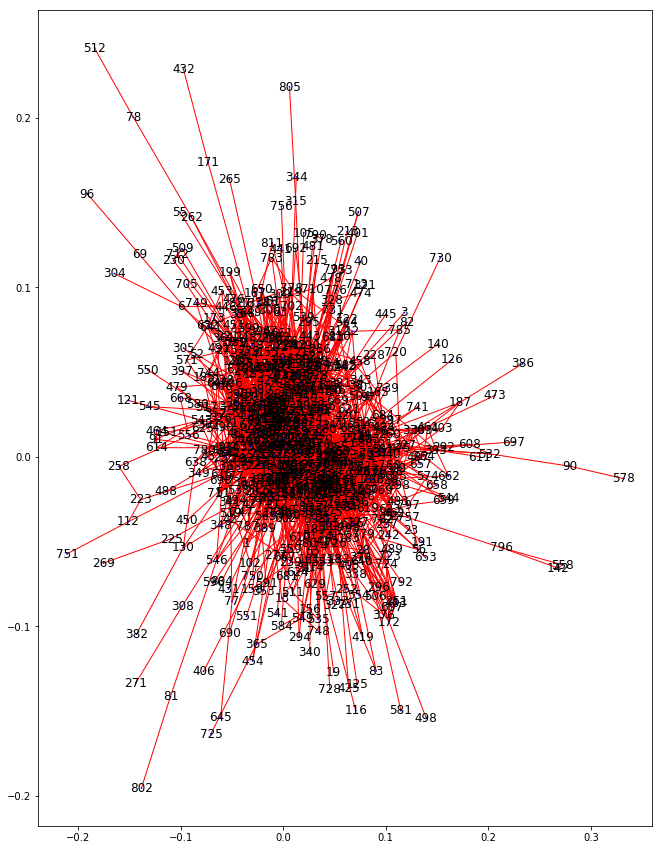

In [137]:
plt.figure(figsize=[11,15])
nx.draw_networkx(subgraphs[0],node_color='b',edge_color='r',node_size=[0.5,0.5],with_labels=True,pos= nx.spring_layout(G))
plt.show()

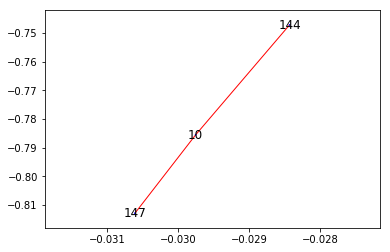

In [173]:
nx.draw_networkx(subgraphs[3],node_color='b',edge_color='r',node_size = [0.5,0.5],with_labels=True,pos= nx.spring_layout(G))

In [174]:
strongest_community = subgraphs[0].nodes()

In [175]:
len(strongest_community)

669

### Using_identifier

In [209]:
parsed_meta = pd.read_csv('/Users/nourghaliaabassi/Desktop/final_sem_project/semester-project/data/Parsed_metadata.csv')

In [274]:
parsed_meta.tail()

,Unnamed: 0,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order,shortend_names,identifier
3259,3259,import2018/274,"['STEM', 'design', 'CSCL']",en,https://doi.dx.org/10.22318/cscl2018.1259,Book chapter,International Society of the Learning Science...,Knowledge Integration in the Digital Age: Traj...,2018-07,2018-11-04 23:27:28+00:00,"Linn, M., Eylon, B., Kidron, A., Gerard, L., T...",2018-11-04 23:27:28+00:00,Researchers from around the world have shaped ...,"Bywater, Jim P",14,23,Chiu J.,NaN
3260,3260,import2017/113,NaN,en,https:dx.doi.org/10.22318/cscl2017.113,Book chapter,"Philadelphia, PA: International Society of the...",Toward a Multi-Level Knowledge Building Innova...,2017-07,2017-06-19 10:53:01+00:00,"Scardamalia, M., Bereiter, C., Laferrière, T.,...",2017-06-19 10:53:01+00:00,Knowledge building requires collaborative boot...,"Zhang, Jianwei",14,23,Zhang J.,"Scardamalia, M., Bereiter, C., Laferrière, T.,..."
3261,3261,import2018/274,"['STEM', 'design', 'CSCL']",en,https://doi.dx.org/10.22318/cscl2018.1259,Book chapter,International Society of the Learning Science...,Knowledge Integration in the Digital Age: Traj...,2018-07,2018-11-04 23:27:28+00:00,"Linn, M., Eylon, B., Kidron, A., Gerard, L., T...",2018-11-04 23:27:28+00:00,Researchers from around the world have shaped ...,"Hong, James",11,24,Bywater J. P.,NaN
3262,3262,import2018/274,"['STEM', 'design', 'CSCL']",en,https://doi.dx.org/10.22318/cscl2018.1259,Book chapter,International Society of the Learning Science...,Knowledge Integration in the Digital Age: Traj...,2018-07,2018-11-04 23:27:28+00:00,"Linn, M., Eylon, B., Kidron, A., Gerard, L., T...",2018-11-04 23:27:28+00:00,Researchers from around the world have shaped ...,"Osborne, Jonathan",17,25,Hong J.,NaN
3263,3263,import2018/274,"['STEM', 'design', 'CSCL']",en,https://doi.dx.org/10.22318/cscl2018.1259,Book chapter,International Society of the Learning Science...,Knowledge Integration in the Digital Age: Traj...,2018-07,2018-11-04 23:27:28+00:00,"Linn, M., Eylon, B., Kidron, A., Gerard, L., T...",2018-11-04 23:27:28+00:00,Researchers from around the world have shaped ...,"Laurillard, Dianna",18,26,Osborne J.,NaN


In [272]:
dict_matching_unique = dict(zip(parsed_meta['file'],parsed_meta['identifier']))

In [288]:
#dict_matching_unique.keys()

In [295]:
def matching (x) : 
    x = x.replace('_','/')
    try :
        if x in nans.values: 
            x = x.replace('/','_')
            #print('nan_on {}'.format(x))
            return dict_matching[x]
        else :
            return dict_matching_unique[x]
    except KeyError:
        print('key_error on {}'.format(x))
        x = x.replace('/','_')
        return dict_matching[x]

In [296]:
nans = parsed_meta[parsed_meta['identifier'].isnull()]['file']

In [294]:
references_df['identifier_title'] = references_df['file'].apply(lambda x : matching(x))

In [299]:
references_df['identifier_title'][0]

'Swanson, R. D., Hinojosa, L., & Polman, J. L. (2018). Learning Scientific Practices Through Participation as a Volunteer Community Scientist'

In [413]:
references_df.to_csv('references_nour.csv')

### Doc  References graph 

In [351]:
nodes_doc_ref = set(references_df.identifier_title).union(set(references_df.identifier))

In [297]:
groups = references_df.groupby(by = 'identifier_title')

In [349]:
groups.get_group('Swanson, R. D., Hinojosa, L., & Polman, J. L. (2018). Learning Scientific Practices Through Participation as a Volunteer Community Scientist')

,Unnamed: 0,ref,file,ref_parsed,year,identifier,identifier_title
0,0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni...","Swanson, R. D., Hinojosa, L., & Polman, J. L. ..."
1,1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (...","Swanson, R. D., Hinojosa, L., & Polman, J. L. ..."
2,2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...","Swanson, R. D., Hinojosa, L., & Polman, J. L. ..."
3,3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act...","Swanson, R. D., Hinojosa, L., & Polman, J. L. ..."
4,4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip...","Swanson, R. D., Hinojosa, L., & Polman, J. L. ..."


In [446]:
references_df.groupby('identifier').count()[references_df.groupby('identifier').count()['year']>30]

,Unnamed: 0,ref,file,ref_parsed,year,identifier_title
identifier,,,,,,
"Jordan, B., & Henderson, A. (1995). Interaction analysis: Foundations and practice",31,31,31,31,31,31
"Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation",32,32,32,32,32,32
"Scardamalia, M. (2002). Collective cognitive responsibility for the advancement of knowledge",32,32,32,32,32,32


In [358]:
#groups.get_group('Kolowich, S. (2013, May 1). Faculty backlash grows against online partners')

In [430]:
count = 0
for key, value in graph.items():
    if 'Wenger, E. (1998). Communities of practice: Learning, meaning, and identity' in value:
        count = count + 1

In [431]:
count

12

In [429]:
graph['Swanson, R. D., Hinojosa, L., & Polman, J. L. (2018). Learning Scientific Practices Through Participation as a Volunteer Community Scientist']

['Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation',
 'Miles, M. B., Huberman, A. M., & Saldana, J. (2013). Qualitative data analysis: A methods sourcebook',
 'Pea, R. D., Gomez, L. M., Edelson, D. C., Fishman, B. J., Gordin, D. N., & O’Neill, D. K. (1997). Science education as a driver of cyberspace technology development',
 'Rogoff, B. (1995). Observing sociocultural activity on three planes: Participatory appropriation, guided participation, and apprenticeship',
 'Shirk, J., Ballard, H., Wilderman, C., Phillips, T., Wiggins, A., Jordan, R., ... & Bonney, R. (2012). Public participation in scientific research: a framework for deliberate design']

In [353]:
graph = dict()
for title in nodes_doc_ref: 
    try : 
        graph[title] = list(groups.get_group(title).identifier)
    except KeyError:
        graph[title] = []

In [356]:
G_doc = nx.DiGraph(graph)

In [445]:
see = G_doc.degree()
see

DiDegreeView({'Kolowich, S. (2013, May 1). Faculty backlash grows against online partners': 2, 'Severance, S., Penuel, W.R., Sumner, T., & Leary, H. (2016). Organizing for teacher agency in curricular co-design': 1, 'Viera, A.J., & Garrett, J.M. (2005). Understanding interobserver agreement: The kappa statistic': 1, 'Stevens, R., Satwicz, T., & McCarthy, L. (2008). In game, In room, In world: Reconnecting video game play to the rest of kids’ lives': 1, 'Beaumont, R., & Sofronoff, K. (2008). A multi-component social skills intervention for children with Asperger syndrome: The junior detective training program': 1, 'Gerard, L. F., Varma, K., Corliss, S. B., & Linn, M. C. (2011). Professional development for technologyenhanced inquiry science': 1, 'Slavin, R. E. (2012). Classroom applications of cooperative learning': 1, 'Eckert, P. (1989). Jocks and burnouts: Social categories and identity in the high school': 1, 'Koedinger, K. R., Corbett, A. T., & Perfetti, C. (2012). The Knowledge-Lea

In [443]:
sorted(see.items(), key=operator.itemgetter(1),reverse=True)

AttributeError: 'DiDegreeView' object has no attribute 'items'

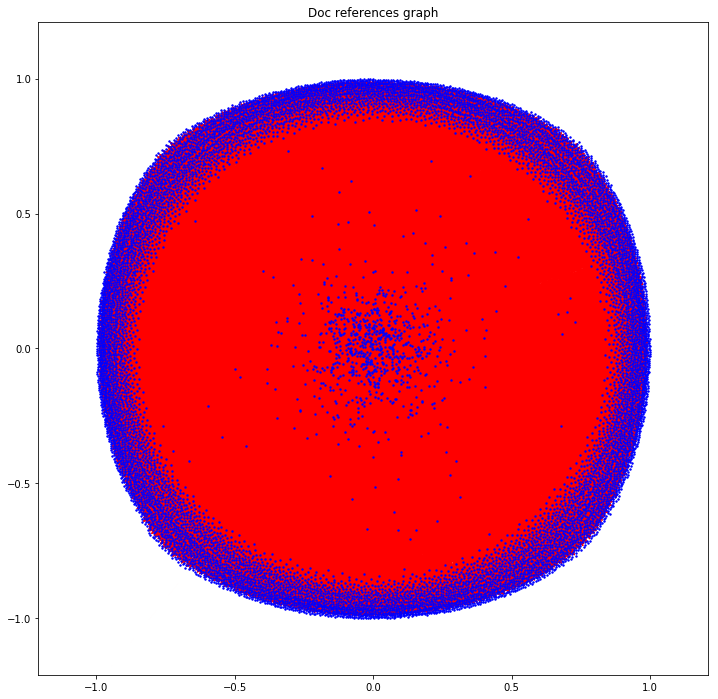

In [357]:
plt.figure(figsize = (12,12))
nx.draw_networkx(G_doc,node_color='b',edge_color='r',node_size= 2, with_labels=False,pos= nx.spring_layout(G_doc))
plt.title('Doc references graph')
plt.show()


In [432]:
core = nx.core_number(G_doc)

In [434]:
core['Wenger, E. (1998). Communities of practice: Learning, meaning, and identity']

3

In [417]:
sorted(core.items(), key=operator.itemgetter(1),reverse=True)

[('Bereiter, C. (2016). The Epistemology of Science  and the Epistemology of Science Teaching ',
  3),
 ('Engle, R. A., & Conant, F. R. (2002). Guiding principles for fostering productive disciplinary engagement: Explaining an emergent argument in a community of learners classroom',
  3),
 ('Wertsch, J. V. (1998). Mind as action', 3),
 ('Gutiérrez, K. D., & Rogoff, B. (2003). Cultural ways of learning: Individual traits or repertoires of practice',
  3),
 ('Hod, Y., Ben-Zvi, D., & Dvir, M. (2018). Interconnecting Knowledge, Experience, and Self in Humanistic Knowledge Building Communities',
  3),
 ('Zhang, J., Chen, M.-H., Tao, D., Lee, J. Sun, Y., & Judson, D. (2015). Fostering sustained knowledge building through metadiscourse aided by the Idea Thread Mapper',
  3),
 ('Bereiter, C., Cress, U., Fischer, F., Hakkarainen, K., Scardamalia, M., & Vogel, F. (2017). Scripted and Unscripted Aspects of Creative Work With Knowledge In Smith, B',
  3),
 ('Peppler, K. A., Thompson, N., Danish, J

In [363]:
import operator
most_cited = nx.pagerank(G_doc)
most_cited = sorted(most_cited.items(), key=operator.itemgetter(1),reverse=True)
most_cited

[('Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation',
  0.0002588497796832766),
 ('Jordan, B., & Henderson, A. (1995). Interaction analysis: Foundations and practice',
  0.0002389751023410086),
 ('Scardamalia, M. (2002). Collective cognitive responsibility for the advancement of knowledge',
  0.00020901256849513683),
 ('Papert, S. (1980). Mindstorms: Children, computers, and powerful ideas',
  0.00017945456276307207),
 ('Scardamalia, M., & Bereiter, C. (2006). Knowledge building: Theory, pedagogy, and technology',
  0.00017128111065866036),
 ('Scardamalia, M., & Bereiter, C. (2014). Knowledge building and knowledge creation: Theory, pedagogy, and technology',
  0.00015780616607334813),
 ('Wenger, E. (1998). Communities of practice: Learning, meaning, and identity',
  0.00015613207723069427),
 ('Hesse, F., Care, E., Buder, J., Sassenberg, K., & Griffin, P. (2015). A framework for teachable collaborative problem solving skills',
  0.000149968175080945

In [364]:
indeg = nx.in_degree_centrality(G_doc)

In [365]:
indeg = sorted(indeg.items(), key=operator.itemgetter(1),reverse=True)
indeg

[('Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation',
  0.0025619834710743803),
 ('Jordan, B., & Henderson, A. (1995). Interaction analysis: Foundations and practice',
  0.0023140495867768596),
 ('Scardamalia, M. (2002). Collective cognitive responsibility for the advancement of knowledge',
  0.0021487603305785125),
 ('Scardamalia, M., & Bereiter, C. (2006). Knowledge building: Theory, pedagogy, and technology',
  0.0016528925619834713),
 ('Papert, S. (1980). Mindstorms: Children, computers, and powerful ideas',
  0.0015702479338842977),
 ('Barron, B. (2003). When smart groups fail', 0.001322314049586777),
 ('National Research Council. (2012). A framework for K-12 science education: Practices, crosscutting concepts, and core ideas',
  0.0012396694214876034),
 ('Engle, R. A., & Conant, F. R. (2002). Guiding principles for fostering productive disciplinary engagement: Explaining an emergent argument in a community of learners classroom',
  0.001074380

In [350]:
graph['Swanson, R. D., Hinojosa, L., & Polman, J. L. (2018). Learning Scientific Practices Through Participation as a Volunteer Community Scientist']

['Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation',
 'Miles, M. B., Huberman, A. M., & Saldana, J. (2013). Qualitative data analysis: A methods sourcebook',
 'Pea, R. D., Gomez, L. M., Edelson, D. C., Fishman, B. J., Gordin, D. N., & O’Neill, D. K. (1997). Science education as a driver of cyberspace technology development',
 'Rogoff, B. (1995). Observing sociocultural activity on three planes: Participatory appropriation, guided participation, and apprenticeship',
 'Shirk, J., Ballard, H., Wilderman, C., Phillips, T., Wiggins, A., Jordan, R., ... & Bonney, R. (2012). Public participation in scientific research: a framework for deliberate design']

In [348]:
graph['Kolowich, S. (2013, May 1). Faculty backlash grows against online partners']

[]

### Co-citations in conferences 

In [345]:
graph_in_conf = dict()
in_conf = set(references_df['identifier_title'])
for title in in_conf:
    l = set()
    for elem in groups.get_group(title).identifier:
        if elem in in_conf : 
            l.add(elem)
    graph_in_conf[title] = l

In [400]:
len(G_inconf.edges())

2

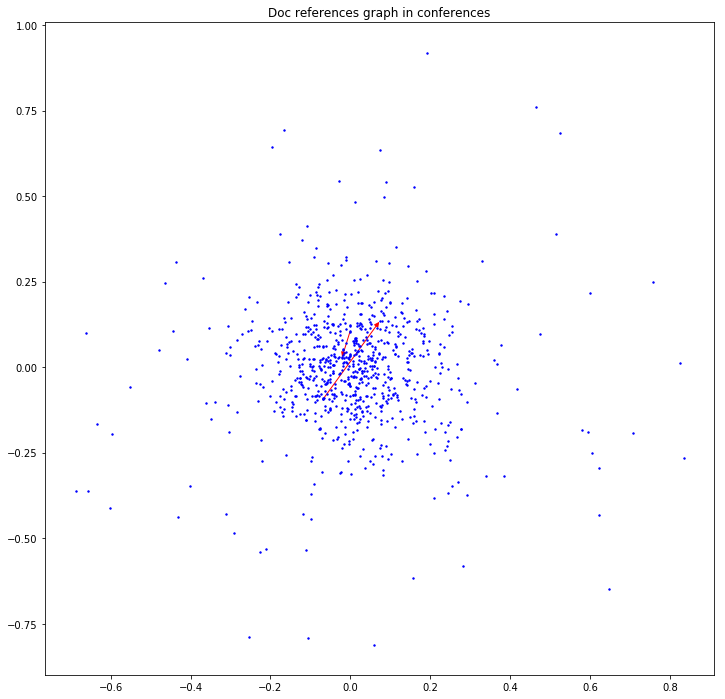

In [347]:
G_inconf = nx.DiGraph(graph_in_conf)
plt.figure(figsize = (12,12))
nx.draw_networkx(G_inconf,node_color='b',edge_color='r',node_size= 2, with_labels=False,pos= nx.spring_layout(G))
plt.title('Doc references graph in conferences')
plt.show()

### Third graph

If doc cites a and b there is a link between a and b

In [392]:
def create_pairs (groups):
    list_of_pairs = set()
    for title in references_df['identifier_title']:
        group = groups.get_group(title)['identifier']
        for elem in group : 
            for elem2 in group: 
                if elem != elem2: 
                    list_of_pairs.add((elem,elem2))
    return list(list_of_pairs)

In [393]:
edges = create_pairs(groups)

In [389]:
len(graph_3.edges)

5684

In [394]:
graph_3 = nx.Graph()

In [395]:
graph_3.add_nodes_from(nodes_doc_ref)
graph_3.add_edges_from(edges)

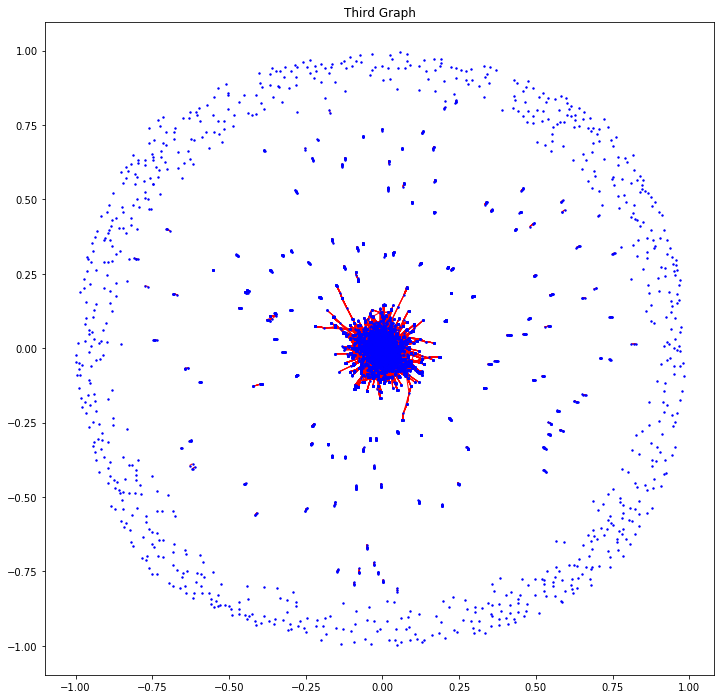

In [396]:
#G_3 =nx.Graph(graph_3)
plt.figure(figsize = (12,12))
nx.draw_networkx(graph_3,node_color='b',edge_color='r',node_size= 2, with_labels=False,pos= nx.spring_layout(graph_3), )
plt.title('Third Graph')
plt.show()

In [398]:
#subgraphs_3 = list(nx.strongly_connected_component_subgraphs(graph_3))

In [399]:
nx.write_gexf(G, "co_authors.gexf")
nx.write_gexf(G_doc, "G_doc_most_cited.gexf")
nx.write_gexf(G_inconf, "inside_conf.gexf")
nx.write_gexf(graph_3, "cited_by_the_same.gexf")


In [455]:
nx.__version__

'2.1'

In [436]:
from networkx import community 

In [453]:
#from networkx.algorithms.community import greedy_modularity_communities

ImportError: cannot import name 'greedy_modularity_communities'

In [437]:
#iterator = community.girvan_newman(graph_3)

In [451]:
communities = modularity.greedy_modularity_communities(graph_3)

NameError: name 'modularity' is not defined